<a href="https://colab.research.google.com/github/kentokura/python_medical_images/blob/master/chapter3/chap3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## 3.4 画像のリサイズ

本節の学び
- 画像のリサイズ
- 有効視野の計算
- リサイズに伴うピクセルスペーシングの計算
- ピクセル補完の比較

### 3.4.1
画像サイズの変更を**リサイズ**や**リサンプリング**と呼ぶ。

- 拡大は**アップサンプリング**
- 縮小は**ダウンサンプリング**a

リサイズされたデータは現画像とは別のデータとして扱う。
- 類語にズームがあるが、マトリクスサイズを変更せずに疑似的に拡大してみせるので違う。

リスト 3.4.1 リサイズ(リサンプリング)

interpolation...補間

オリジナルサイズ (3000, 3000)
ダウンサンプリング1 (256, 256)
ダウンサンプリング2 (300, 300)


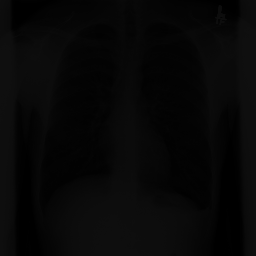

In [14]:
from google.colab.patches import cv2_imshow

# 画像のロードとオリジナルサイズの確認
chest = cv2.imread('/content/drive/My Drive/DATASET/dataset/ChestXray.png',
                   cv2.IMREAD_GRAYSCALE)
print("オリジナルサイズ", chest.shape)
# リサイズ3000を256へ
chest256 = cv2.resize(src=chest, dsize=(256, 256),
                      interpolation=cv2.INTER_LINEAR)
print("ダウンサンプリング1", chest256.shape)

# 係数でサイズ変更(1/10)
img300 = cv2.resize(src=chest, dsize=None, fx=0.1, fy=0.1,
                      interpolation=cv2.INTER_LINEAR)
print("ダウンサンプリング2", img300.shape)

# ゴミX線写真www
# 真っ黒じゃないよ！
cv2_imshow(chest256)


### 3.4.2 ピクセル補間

- バイリニア補間
- インターにアレスト補間
- ニアレストネイバー補間

...


リスト 3.4.2 ピクセル補間

sinc 関数は、正弦関数をその変数で割って得られる初等関数である.

sinc = (sinx) / x


[]

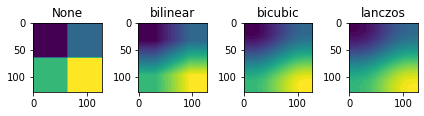

In [36]:
# 2*2ピクセル画像(8-bit)を作成
pix = np.zeros((2,2))
pix[0,0] = 10
pix[0,1] = 20
pix[1,0] = 30
pix[1,1] = 40
pix = np.uint8(pix) # 8-bit化

# アップサンプリング
# インターニアレスト(補間なし)
internearest = cv2.resize(src=pix, dsize=(128,128),
                          interpolation=cv2.INTER_NEAREST)
plt.subplot(141)
plt.title("None")
plt.imshow(internearest)

# バイリニア
linear = cv2.resize(src=pix, dsize=(128,128),
                          interpolation=cv2.INTER_LINEAR)
plt.subplot(142)
plt.title("bilinear")
plt.imshow(linear)

# バイキュービック
cubic = cv2.resize(src=pix, dsize=(128,128),
                          interpolation=cv2.INTER_CUBIC)
plt.subplot(143)
plt.title("bicubic")
plt.imshow(cubic)

# バイリニア
lanczos = cv2.resize(src=pix, dsize=(128,128),
                          interpolation=cv2.INTER_LANCZOS4)
plt.subplot(144)
plt.title("lanczos")
plt.imshow(lanczos)

plt.tight_layout()
plt.plot()